In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 1. Data Loading

In [135]:
df = pd.read_csv('../data/car_price_prediction_raw.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [136]:
df.columns, df.columns.shape

(Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
        'transmission', 'owner'],
       dtype='object'),
 (8,))

In [137]:
df.index, df.index.shape

(RangeIndex(start=0, stop=4340, step=1), (4340,))

In [138]:
df.values, df.values.shape

(array([['Maruti 800 AC', 2007, 60000, ..., 'Individual', 'Manual',
         'First Owner'],
        ['Maruti Wagon R LXI Minor', 2007, 135000, ..., 'Individual',
         'Manual', 'First Owner'],
        ['Hyundai Verna 1.6 SX', 2012, 600000, ..., 'Individual',
         'Manual', 'First Owner'],
        ...,
        ['Maruti 800 AC BSIII', 2009, 110000, ..., 'Individual', 'Manual',
         'Second Owner'],
        ['Hyundai Creta 1.6 CRDi SX Option', 2016, 865000, ...,
         'Individual', 'Manual', 'First Owner'],
        ['Renault KWID RXT', 2016, 225000, ..., 'Individual', 'Manual',
         'First Owner']], dtype=object),
 (4340, 8))

In [139]:
print("Dataset shape (rows, columns):")
print(df.shape)

Dataset shape (rows, columns):
(4340, 8)


In [140]:
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object


## 2. Data Cleaning

### A. Clean Column Names

In [141]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("Cleaned Column Names are")
print(df.columns)

Cleaned Column Names are
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


### B. Fix Data Types

In [142]:
print("Data types are")

if df['year'].dtype != 'int64':
    df['year'] = df['year'].astype(int)

df.dtypes

Data types are


name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

### C. Handle Missing Values

In [143]:
print("Missing values in each column")
df.isnull().sum()

Missing values in each column


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### D. Remove Duplicates

In [144]:
print("Number of duplicate rows before")
print(df.duplicated().sum())

df = df.drop_duplicates()

print("Number of duplicate rows after")
print(df.duplicated().sum())

Number of duplicate rows before
763
Number of duplicate rows after
0


### E. Save Cleaned Data

In [145]:
df.to_csv('../data/car_price_prediction_cleaned.csv', index=False)
print("Cleaned dataset saved to data/car_price_prediction_cleaned.csv")

Cleaned dataset saved to data/car_price_prediction_cleaned.csv


## 3. Exploratory Data Analysis (EDA)

### A. Target Variable Distribution

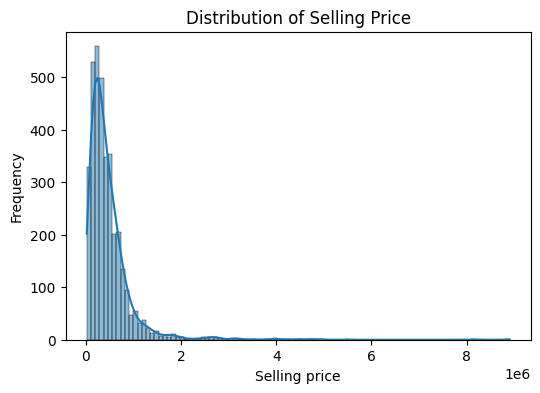

In [146]:
plt.figure(figsize=(6, 4))
sns.histplot(df['selling_price'], kde=True, bins=100)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling price')
plt.ylabel('Frequency')
plt.show()

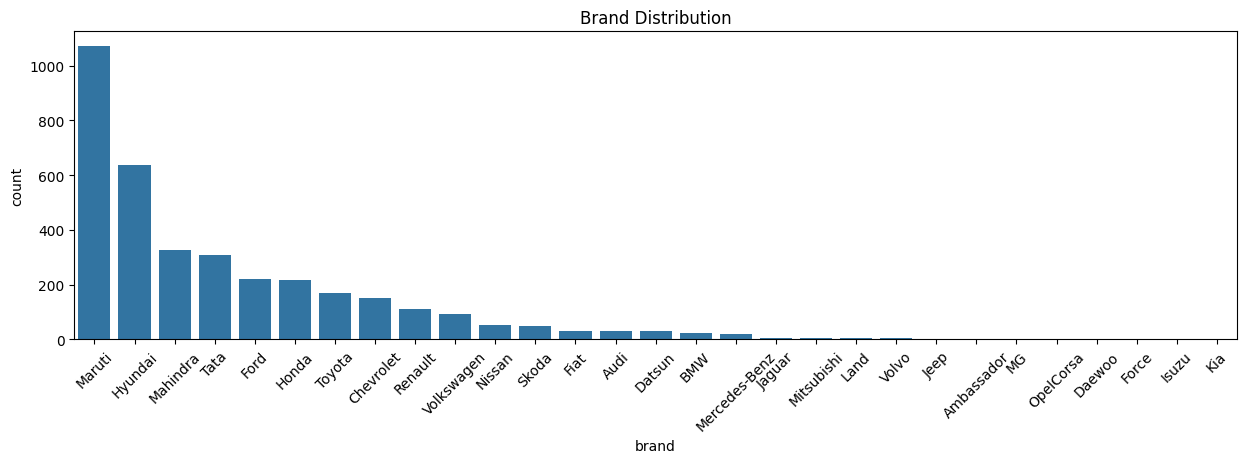

In [147]:
df['brand'] = df['name'].str.split().str[0]
df['brand'].value_counts()

plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Brand Distribution')
plt.show()

### B. Univariate Analysis

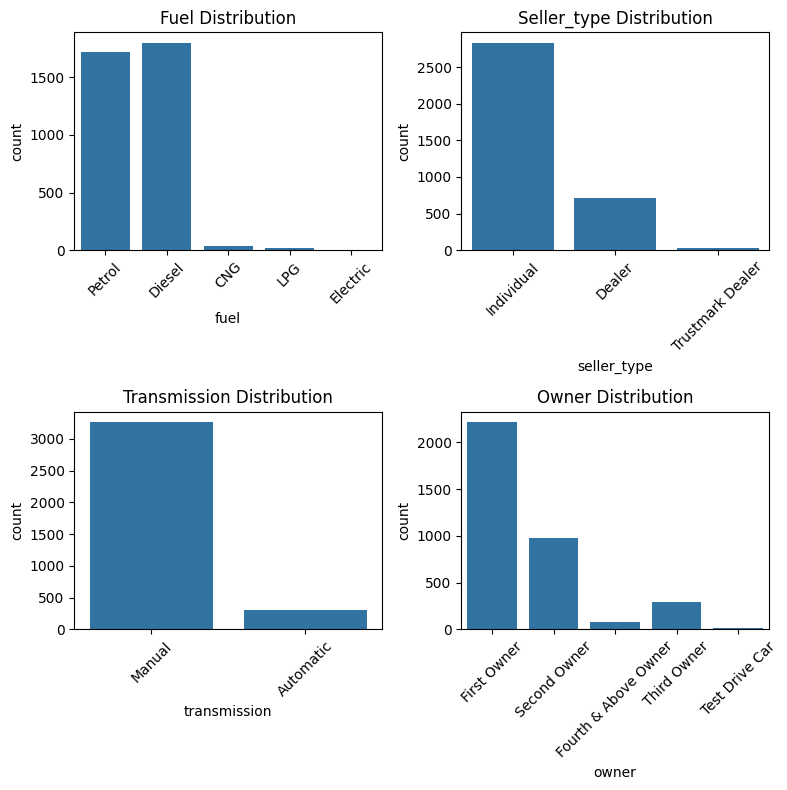

In [148]:
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"{col.capitalize()} Distribution")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

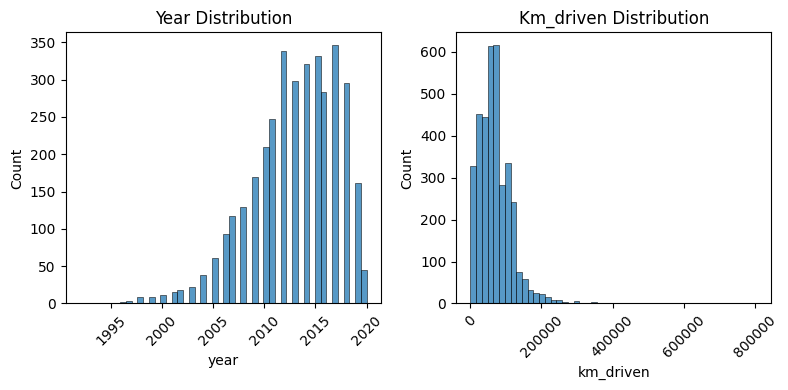

In [149]:
numerical_cols = ['year', 'km_driven']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, bins=50, ax=axes[i])
    axes[i].set_title(f"{col.capitalize()} Distribution")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### C. Bivariate Analysis

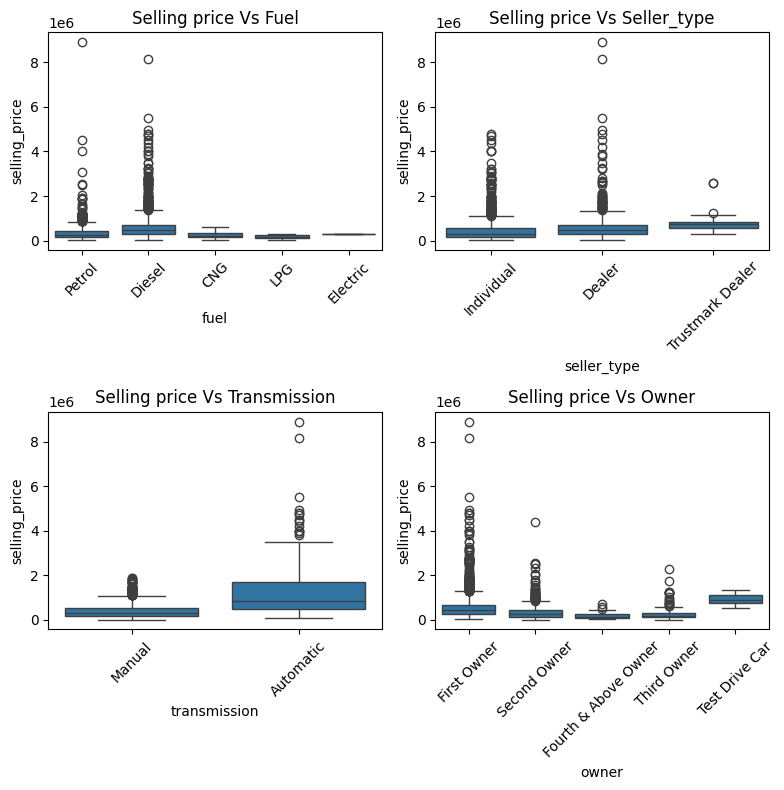

In [150]:
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x=col, y='selling_price', ax=axes[i])
    axes[i].set_title(f"Selling price Vs {col.capitalize()}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

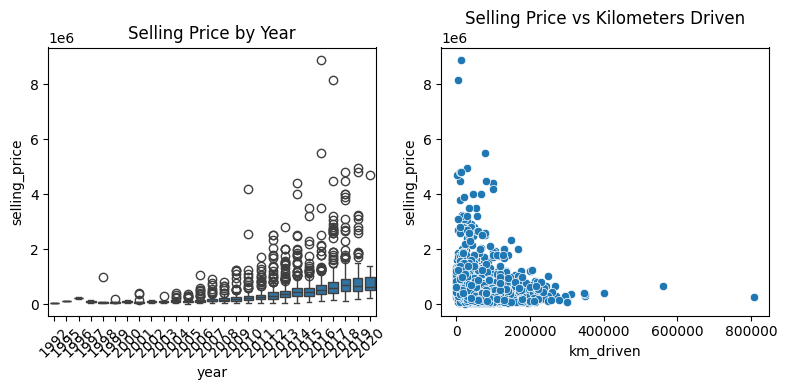

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Boxplot: Selling Price by Year
sns.boxplot(x='year', y='selling_price', data=df, ax=axes[0])
axes[0].set_title('Selling Price by Year')
axes[0].tick_params(axis='x', rotation=45)

# Scatterplot: Selling Price vs KM Driven
sns.scatterplot(x='km_driven', y='selling_price', data=df, ax=axes[1])
axes[1].set_title('Selling Price vs Kilometers Driven')

plt.tight_layout()
plt.show()

### D. Correlation Matrix

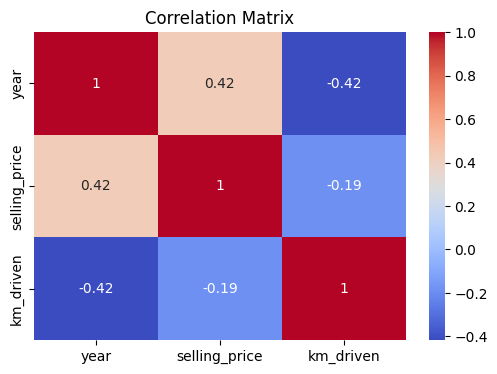

In [152]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['year', 'selling_price', 'km_driven']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## 4. Feature Extraction

### A. Addition Column

In [153]:
from datetime import datetime

current_year = datetime.now().year
df['car_age'] = current_year - df['year']
df.drop(columns=['year'], inplace=True)

### B. Encode Categorical values

In [154]:
# if you label-encode a column, the model assumes: CNG > Diesel > Petrol (numerically) in case of Regression
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner', 'brand'], drop_first=True)

### C. Drop Unnecessary Columns

In [155]:
df.drop(columns=['name'], inplace=True)

## 5. Feature Selection

### A. Correlation Matrix

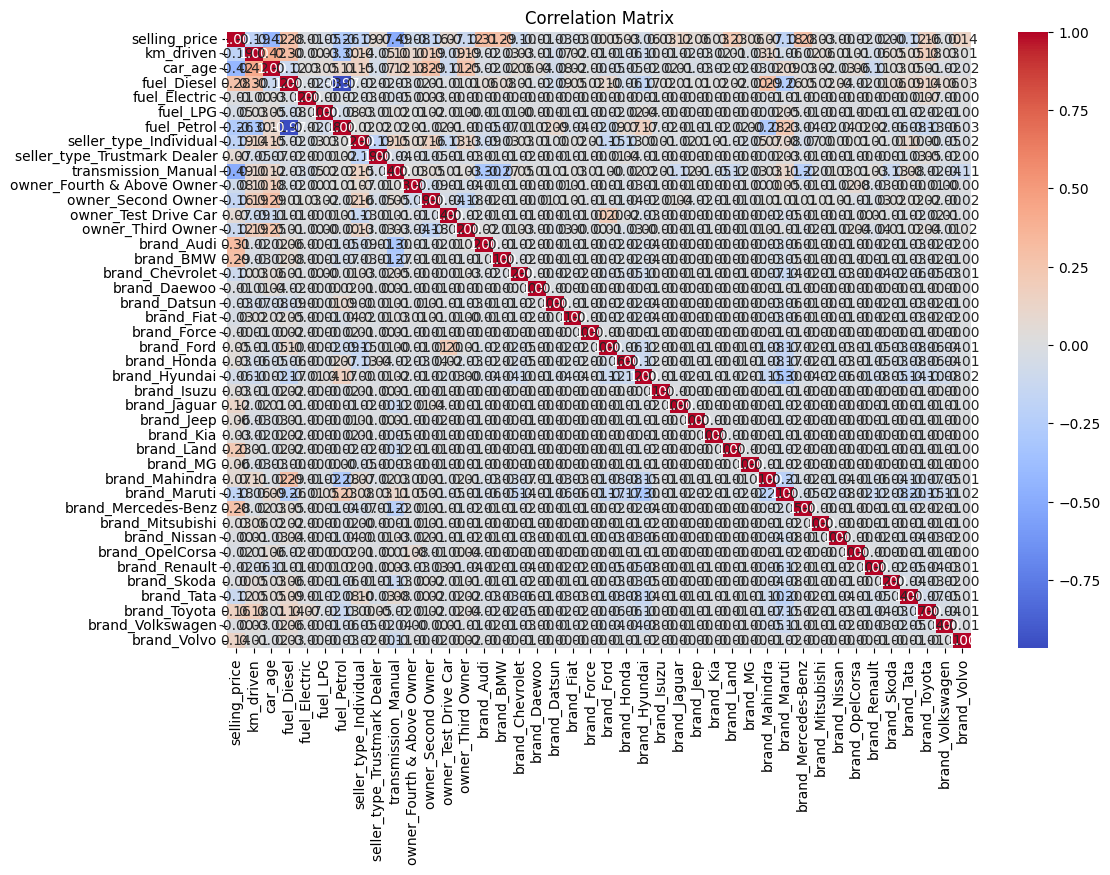

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### B. Variance Inflation Factor

In [157]:
X = df.drop('selling_price', axis=1)

# Convert bool columns (True/False) to integers (1/0)
X = X.astype(int)

# Then add constant and compute VIF
from statsmodels.tools.tools import add_constant
X_const = add_constant(X)

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif_data.sort_values(by='VIF', ascending=False).head()

,feature,VIF
0,const,1335.402526
31,brand_Maruti,252.692484
23,brand_Hyundai,176.678105
30,brand_Mahindra,100.929587
38,brand_Tata,95.344910


In [158]:
# Remove 'brand_Maruti' and recalculate VIF
X_const = X_const.drop('brand_Maruti', axis=1)

In [159]:
vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Step 6: Display VIF
vif_data.sort_values(by='VIF', ascending=False).head()

,feature,VIF
0,const,123.892768
3,fuel_Diesel,25.386208
6,fuel_Petrol,24.989542
2,car_age,1.630049
5,fuel_LPG,1.593067


In [160]:
# Remove 'fuel_Diesel' and recalculate VIF
X_const = X_const.drop('fuel_Diesel', axis=1)

In [161]:
vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Step 6: Display VIF
vif_data.sort_values(by='VIF', ascending=False).head()

,feature,VIF
0,const,32.795496
2,car_age,1.630045
1,km_driven,1.525426
8,transmission_Manual,1.476145
5,fuel_Petrol,1.453062


### C. Update Actual Dataset

In [162]:
cols_to_remove = ['brand_Maruti', 'fuel_Diesel']
df_reduced = df.drop(columns=cols_to_remove)

## 6. Model Building

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_reduced.drop('selling_price', axis=1)
y = df_reduced['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

## 7. Model Evaluation

In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_results = []
# To create a dataframe
def evaluate_model(name, y_test, y_pred):
    model_results.append({
        'Model': name,
        'MAE': round(mean_absolute_error(y_test, y_pred), 2),
        'MSE': round(mean_squared_error(y_test, y_pred), 2),
        'RMSE': round(mean_squared_error(y_test, y_pred, squared=False), 2),
        'R² Score': round(r2_score(y_test, y_pred), 4)
    })
    print("MAE      :", round(mean_absolute_error(y_test, y_pred), 2))
    print("MSE      :", round(mean_squared_error(y_test, y_pred), 2))
    print("RMSE     :", round(mean_squared_error(y_test, y_pred, squared=False), 2))
    print("R² Score :", round(r2_score(y_test, y_pred), 4))

evaluate_model('Linear Regression', y_test, y_pred)

MAE      : 181065.93
MSE      : 149288402109.44
RMSE     : 386378.57
R² Score : 0.5366


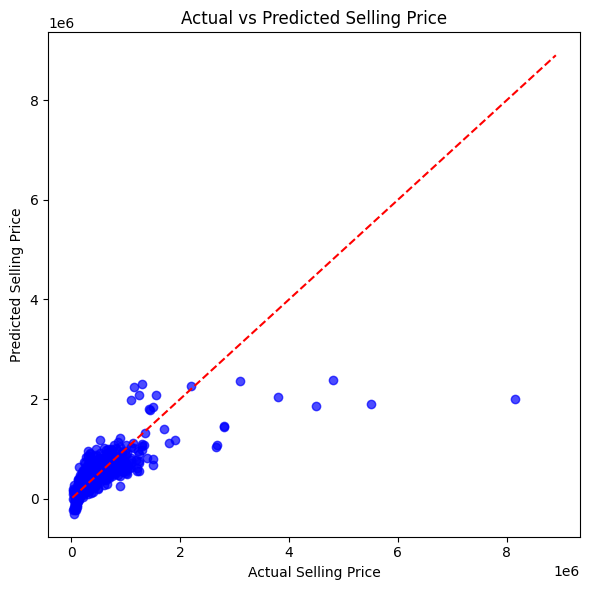

In [173]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line: y = x
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.tight_layout()
plt.show()

## 8. Hyperparameter Tuning for Ridge and Lasso regression

### A. Ridge Regession

In [174]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge()
params_ridge = {'alpha': [0.01, 0.1, 1, 10, 100, 200]}

ridge_grid = GridSearchCV(ridge, params_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge CV MSE:", -ridge_grid.best_score_)

ridge_best = ridge_grid.best_estimator_

ridge_pred = ridge_best.predict(X_test)

evaluate_model('Ridge Regression', y_test, ridge_pred)

Best Ridge alpha: {'alpha': 0.1}
Best Ridge CV MSE: 92751152953.89926
MAE      : 181161.29
MSE      : 149511300453.51
RMSE     : 386666.91
R² Score : 0.5359


### B. Lasso Rgeression

In [175]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

lasso = Lasso()
params_lasso = {'alpha': [0.01, 0.1, 1, 10, 100, 200]}

lasso_grid = GridSearchCV(lasso, params_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

print("Best Ridge alpha:", lasso_grid.best_params_)
print("Best Ridge CV MSE:", -lasso_grid.best_score_)

lasso_best = lasso_grid.best_estimator_

lasso_pred = lasso_best.predict(X_test)

evaluate_model('Lasso Regression', y_test, lasso_pred)

Best Ridge alpha: {'alpha': 100}
Best Ridge CV MSE: 92820213755.76814
MAE      : 181391.16
MSE      : 149895931428.29
RMSE     : 387163.96
R² Score : 0.5347


In [176]:
results_df = pd.DataFrame(model_results, index=None)
results_df.to_csv("../outputs/model_metrics.csv", index=False)
results_df

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,181065.93,1.492884e+11,386378.57,0.5366
1,Ridge Regression,181161.29,1.495113e+11,386666.91,0.5359
2,Lasso Regression,181391.16,1.498959e+11,387163.96,0.5347


## Saving the Model

In [169]:
import joblib
import os

model_path = os.path.join("../outputs", "linear_regression_model.pkl")
joblib.dump(linear_model, model_path)

model_path = os.path.join("../outputs", "ridge_regression_model.pkl")
joblib.dump(ridge_best, model_path)

model_path = os.path.join("../outputs", "lasso_regression_model.pkl")
joblib.dump(lasso_best, model_path)

print()

## 10. Load the model and Predict

In [170]:
row = 1
single_row = X_test.iloc[row]   
single_row_df = single_row.to_frame().T

linear_model = joblib.load("../outputs/linear_regression_model.pkl")
y_pred_lr = linear_model.predict(single_row_df)

ridge_model = joblib.load("../outputs/ridge_regression_model.pkl")
y_pred_ridge = ridge_model.predict(single_row_df)

lasso_model= joblib.load("../outputs/lasso_regression_model.pkl")
y_pred_lasso = lasso_model.predict(single_row_df)

print(f"Actual Value                           : {y_test.iloc[row]}")
print(f"Predicted value from linear regression : {y_pred_lr[0]}")
print(f"Predicted value from ridge regression  : {y_pred_ridge[0]}")
print(f"Predicted value from lasso regression  : {y_pred_lasso[0]}")

Actual Value                           : 525000
Predicted value from linear regression : 467065.6562073006
Predicted value from ridge regression  : 468327.2346624478
Predicted value from lasso regression  : 472804.8716177611
